## P- Median Location Problem


### Import Packages

In [38]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import time
from IPython.display import clear_output

### Inputs - Instance 1

In [47]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)




### Inputs - Instance 2

In [46]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

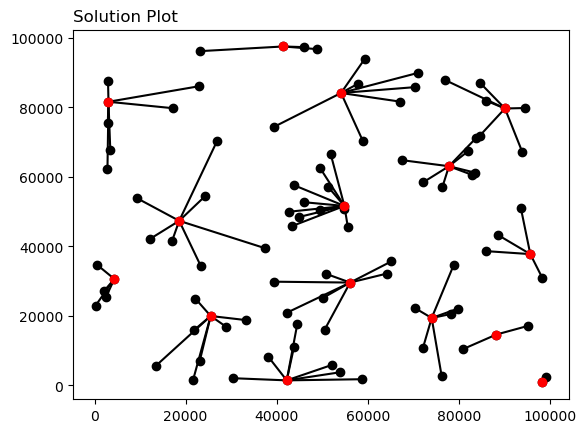

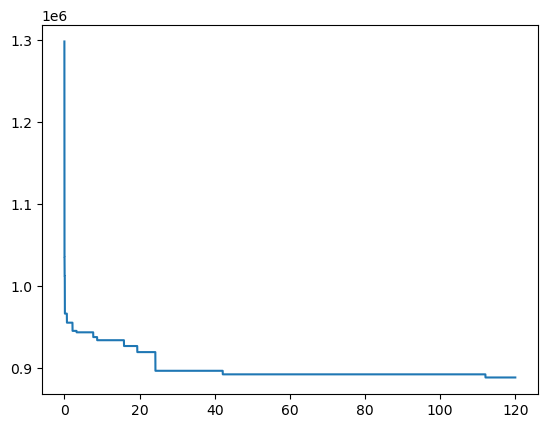

In [48]:
#Connect points and plot
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

#Keep track of program run time.
program_starts = time.time()
cputime_i=[0,0]
best_neighbours = {}
best_dist_lst = []
cpu_time_lst = []
best_dist = float('inf')
tmp_lst = list([i for i in range(n)])

while cputime_i[-1] < 120:
    #Keep track of the curr_dist in the program execution
    curr_dist = 0

    #Generate random selection of points = openfac
    random.shuffle(tmp_lst)
    indexes = tmp_lst[:openfac]
    data = set(indexes)

    #Keeping track of nearest neighbour in the current run
    neighbours = {}

    #For all fac in indexes, neighbour is empty at start
    for index in indexes:
        neighbours[index] = []

    #Loop through and calculate the distance
    for i in range(openfac, n):
        loc = tmp_lst[i]
        x = coordlct_x[loc]
        y = coordlct_y[loc]
        lowest = float('inf')
        lowest_ind = 0
        for index in indexes:
            #save computing power, dn calculate first
            dist = (x - coordlct_x[index])**2 + (y - coordlct_y[index])**2
            if dist < lowest:
                lowest = dist
                lowest_ind = index
        
        # Sqrt to calculate the distance
        curr_dist += math.sqrt(lowest)

        #The fac add loc
        neighbours[lowest_ind].append(loc)
        
        #Circuit breaker if curr_dist > best_dist
        if curr_dist > best_dist:
            break

    #Update the best answer
    if curr_dist < best_dist:
        best_dist = curr_dist
        best_neighbours = neighbours

    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
    best_dist_lst.append(best_dist)
    cpu_time_lst.append(cputime_i[-1])


plt.plot(coordlct_x, coordlct_y, 'o', color='black')
plt.title("Solution Plot", loc = 'left')
loc_x = [coordlct_x[i] for i in best_neighbours]
loc_y = [coordlct_y[i] for i in best_neighbours]
#For each location connect to the neighbour
for location in best_neighbours: 
    for ind in best_neighbours[location]:
        connectpoints(coordlct_x, coordlct_y, location, ind)
plt.plot(loc_x, loc_y, 'o', color='red')
plt.show()

plt.plot(cpu_time_lst, best_dist_lst)

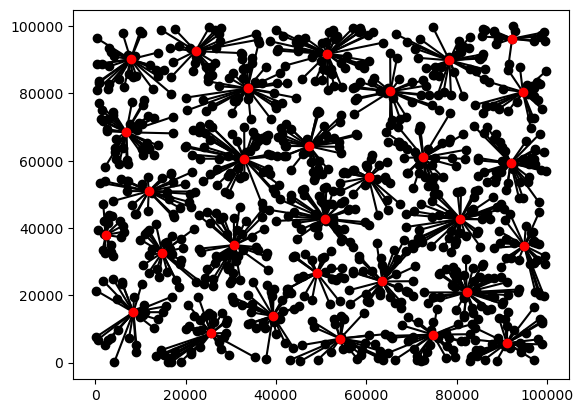

6779129.168612511


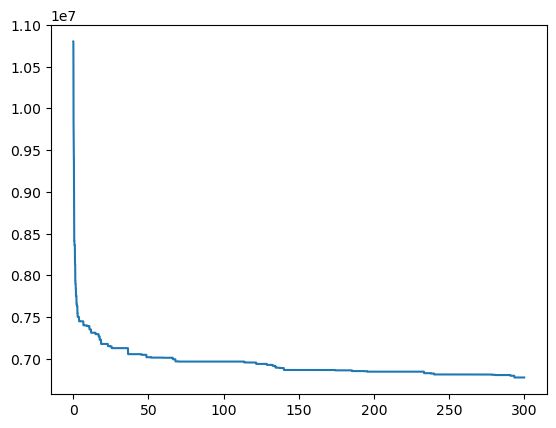

In [43]:
program_starts = time.time()
cputime_i=[0,0]
tmp_lst = list([i for i in range(n)])
random.shuffle(tmp_lst)

indexes = tmp_lst[:openfac]
rest = tmp_lst[openfac:]
best_neighbours = {}

cpu_time_lst = []
best_dist_lst = []
best_dist = float('inf')

while cputime_i[-1] < 300:
    curr_dist = 0
    ind = random.randint(0, len(indexes)-1)
    ind2 = random.randint(0, len(rest)-1)
    indexes[ind], rest[ind2] = rest[ind2], indexes[ind]
    data = set(indexes)

    #Keeping track of nearest neighbour
    neighbours = {}

    #For all fac in indexes, neighbour = 0
    for index in indexes:
        neighbours[index] = []

    #Loop through and calculate the distance
    for loc in rest:
        x = coordlct_x[loc]
        y = coordlct_y[loc]
        lowest = float('inf')
        lowest_ind = 0
        for index in indexes:
            dist = (x - coordlct_x[index])**2 + (y - coordlct_y[index])**2
            if dist < lowest:
                lowest = dist
                lowest_ind = index
        curr_dist += math.sqrt(lowest)
        neighbours[lowest_ind].append(loc)

        if curr_dist > best_dist:
            break

    #Update the best answer
    if curr_dist < best_dist:
        best_dist = curr_dist
        best_ans = indexes
        best_neighbours = neighbours
    else:
        indexes[ind], rest[ind2] = rest[ind2], indexes[ind]

    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
    best_dist_lst.append(best_dist)
    cpu_time_lst.append(cputime_i[-1])

plt.plot(coordlct_x, coordlct_y, 'o', color='black')
loc_x = [coordlct_x[i] for i in best_neighbours]
loc_y = [coordlct_y[i] for i in best_neighbours]
#For each location connect to the neighbour
for location in best_neighbours: 
    for ind in best_neighbours[location]:
        connectpoints(coordlct_x, coordlct_y, location, ind)
plt.plot(loc_x, loc_y, 'o', color='red')
plt.show()
print(best_dist)
plt.plot(cpu_time_lst, best_dist_lst)
